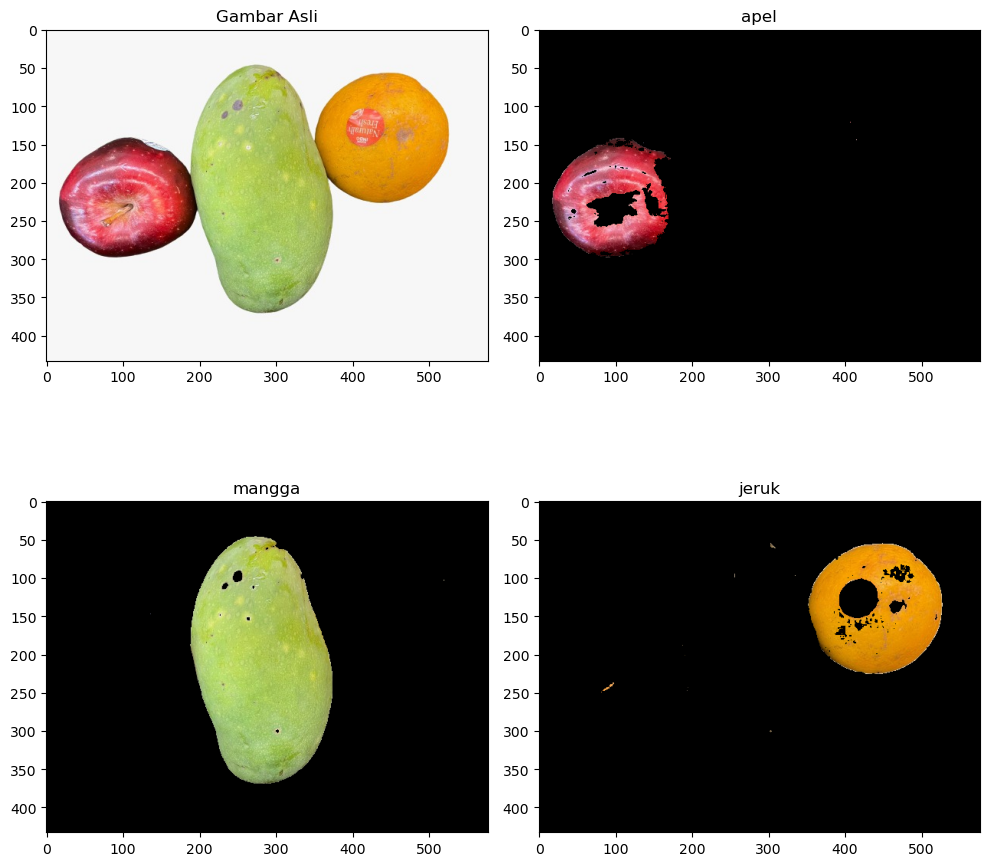

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('buah.jpg')

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red = np.array([50, 50, 50])
upper_red = np.array([179, 280, 280])

lower_green = np.array([25, 50, 50])
upper_green = np.array([128, 300, 300])

lower_orange = np.array([15, 50, 50])
upper_orange = np.array([20, 300, 280])

mask_red = cv2.inRange(hsv_img, lower_red, upper_red)
mask_green = cv2.inRange(hsv_img, lower_green, upper_green)
mask_orange = cv2.inRange(hsv_img, lower_orange, upper_orange)  

result_red = cv2.bitwise_and(img, img, mask=mask_red)
result_green = cv2.bitwise_and(img, img, mask=mask_green)
result_orange = cv2.bitwise_and(img, img, mask=mask_orange)  

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cleaned_mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel)
cleaned_mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_OPEN, kernel)
cleaned_mask_orange = cv2.morphologyEx(mask_orange, cv2.MORPH_OPEN, kernel)  

contours_red, _ = cv2.findContours(cleaned_mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_green, _ = cv2.findContours(cleaned_mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_orange, _ = cv2.findContours(cleaned_mask_orange, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 


fig, axs = plt.subplots(2, 2, figsize=(10, 10)) 

axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Gambar Asli')

axs[0, 1].imshow(cv2.cvtColor(result_red, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('apel')

axs[1, 0].imshow(cv2.cvtColor(result_green, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('mangga')

axs[1, 1].imshow(cv2.cvtColor(result_orange, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('jeruk')

plt.tight_layout()

plt.show()